In [6]:
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import plot_tree
import pandas as pd
import matplotlib.pyplot as plt


X_train = pd.read_csv("../data/X_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_train = pd.read_csv("../data/y_train.csv")
y_test = pd.read_csv("../data/y_test.csv")

# Depth 1 (Equivalent to AdaBoost)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best: -0.040068 using {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.8}
Accuracy on test: 98.55%


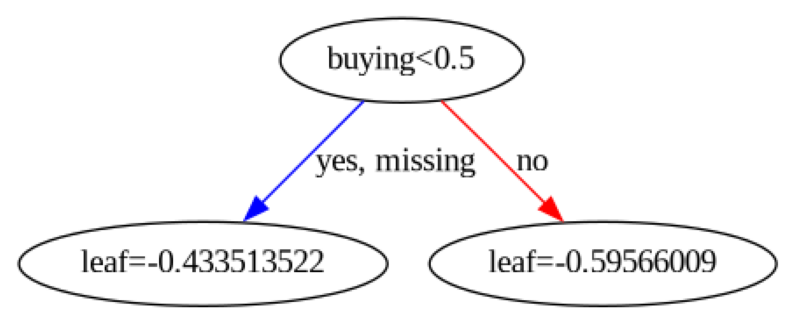

In [7]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [1],
    'n_estimators': [400, 500, 600, 700]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
xgb_model_1 = xgb.XGBClassifier(objective="binary:logistic", random_state=123, **grid_result.best_params_)
xgb_model_1.fit(X_train, y_train)
y_pred = xgb_model_1.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(xgb_model_1, num_trees=0, ax=ax)
plt.show()

In [8]:
pd.Series(xgb_model_1.feature_importances_, index=X_train.columns).sort_values(ascending=False)

buying      0.249741
safety      0.217947
maint       0.200278
persons     0.187004
lug_boot    0.101712
doors       0.043318
dtype: float32

# Depth 2

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best: -0.030072 using {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 2, 'min_child_weight': 1, 'n_estimators': 150, 'subsample': 0.8}
Accuracy on test: 99.13%


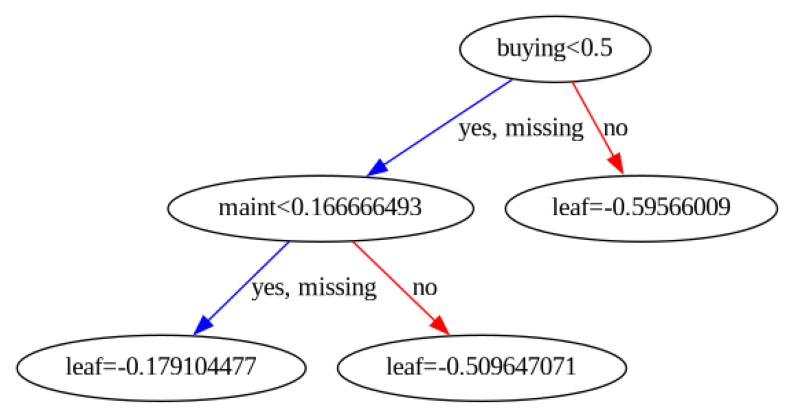

In [9]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [2],
    'n_estimators': [150]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
xgb_model_2 = xgb.XGBClassifier(objective="binary:logistic", random_state=123, **grid_result.best_params_)
xgb_model_2.fit(X_train, y_train)
y_pred = xgb_model_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(xgb_model_2, num_trees=0, ax=ax)
plt.show()

In [10]:
pd.Series(xgb_model_2.feature_importances_, index=X_train.columns).sort_values(ascending=False)

buying      0.244799
persons     0.233352
safety      0.225502
maint       0.157671
lug_boot    0.095494
doors       0.043181
dtype: float32

# Depth 3

Fitting 5 folds for each of 540 candidates, totalling 2700 fits
Best: -0.028814 using {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 400, 'subsample': 0.8}
Accuracy on test: 98.55%


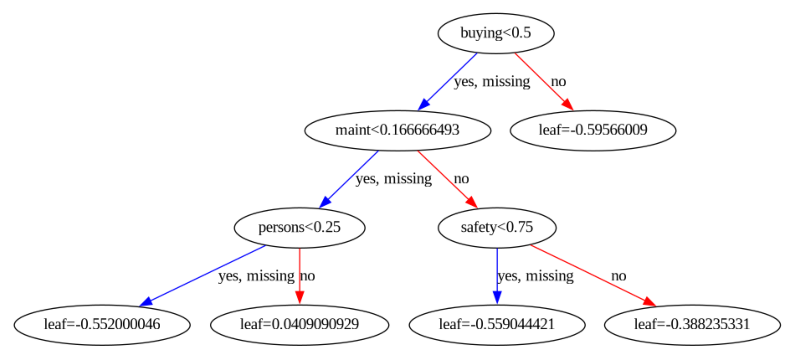

In [11]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3],
    'n_estimators': [100, 200, 300, 400]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
xgb_model_3 = xgb.XGBClassifier(objective="binary:logistic", random_state=123, **grid_result.best_params_)
xgb_model_3.fit(X_train, y_train)
y_pred = xgb_model_3.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(xgb_model_3, num_trees=0, ax=ax)
plt.show()

In [12]:
pd.Series(xgb_model_3.feature_importances_, index=X_train.columns).sort_values(ascending=False)

persons     0.243808
safety      0.229991
buying      0.229507
maint       0.158833
lug_boot    0.099623
doors       0.038238
dtype: float32

# Depth 4

Fitting 5 folds for each of 675 candidates, totalling 3375 fits
Best: -0.029244 using {'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 1, 'n_estimators': 500, 'subsample': 0.8}
Accuracy on test: 99.13%


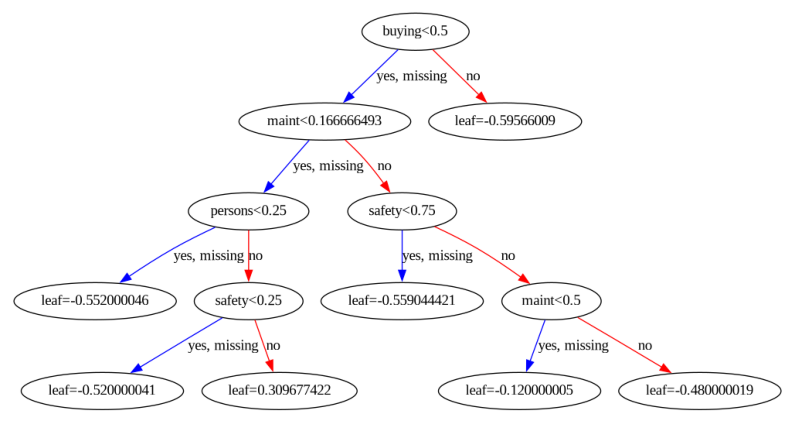

In [13]:
# Now train with grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

# A parameter grid for XGBoost
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [4],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Initialize XGB and GridSearch
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=123)
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(xgb_model, param_grid=params, scoring="neg_log_loss", n_jobs=-1, cv=kfold, verbose=1)

# Run the grid search
grid_result = grid_search.fit(X_train, y_train)

# Print the best parameters
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Print the accuracy
xgb_model_4 = xgb.XGBClassifier(objective="binary:logistic", random_state=123, **grid_result.best_params_)
xgb_model_4.fit(X_train, y_train)
y_pred = xgb_model_4.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test: %.2f%%" % (accuracy * 100.0))

# Plot the tree
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree(xgb_model_4, num_trees=0, ax=ax)
plt.show()

In [14]:
pd.Series(xgb_model_4.feature_importances_, index=X_train.columns).sort_values(ascending=False)

persons     0.252295
safety      0.232935
buying      0.186035
maint       0.175807
lug_boot    0.110604
doors       0.042323
dtype: float32

In [15]:
import numpy as np
y_pred_proba = xgb_model_2.predict_proba(X_test)
y_pred = xgb_model_2.predict(X_test)
abs(y_pred_proba[:, 1] - 0.5)
# Now, get the indices ordered by the difference
idx = np.argsort(abs(y_pred_proba[:, 1] - 0.5))
idx

array([ 35,  45,   1, 104,  74, 132, 219, 215,  11,  10, 277, 126, 169,
       278, 105,  36,  59, 302, 327, 150, 287, 310, 295, 170, 207, 203,
        22, 332, 283,  49,  91, 330,  64, 141, 176, 145, 184, 307,  37,
       161, 289, 311, 116, 194,  95, 122,  44, 258,  19, 308,  89,   3,
        70, 111, 185,   4,  46, 121, 297, 282, 109,  83, 123,  99, 322,
       271, 143,  75,  28, 266, 228, 180,  88, 124,  80, 137,  84,  17,
       333, 188, 288, 267,  87, 280, 274, 331, 306, 220, 175,  18, 151,
       337,  65, 312, 172, 290, 135, 316, 273,  21,  34, 320, 251,  55,
       183, 338, 281, 120, 107, 248, 264, 232,  33, 196,  12, 265,  42,
       115, 119, 198,  43,  52,  68, 192, 114, 240,  67,  85, 319,  50,
       166, 210,   9, 206, 296,  61, 241, 212, 234,  25,  24, 152, 286,
       256, 173, 112, 168, 148, 224,  57, 106,  30,  38,  41, 146, 294,
       182,  13,  51, 326, 227, 113,   5, 178,  47, 315, 102, 284,   7,
       343, 218,  94, 163, 249, 209, 199, 246, 247, 226, 108, 11

In [16]:
X_test.loc[idx[:3]]

,buying,maint,doors,persons,lug_boot,safety
35,0.000000,0.000000,0.000000,0.5,0.5,0.5
45,0.000000,0.666667,0.333333,1.0,0.5,1.0
1,0.333333,0.000000,0.000000,0.5,0.5,0.5


In [17]:
xgb_model_2.predict_proba(X_test.loc[idx[:3]])

array([[0.5324275 , 0.4675725 ],
       [0.5685383 , 0.43146172],
       [0.65636677, 0.34363323]], dtype=float32)

In [28]:
y_test.loc[idx[:3]]

,class
35,0
45,1
1,0


In [27]:
print(xgb_model_2.predict(pd.Series([0, 0, 0, 0.5, 0.5, 1], index=X_test.columns).to_frame().T)) # safety 0.5 -> 1 then 0 -> 1
print(xgb_model_2.predict(pd.Series([0, 1/3, 1/3, 1, 0.5, 1], index=X_test.columns).to_frame().T)) # maint 2/3 -> 1/3 then 0 -> 1
print(xgb_model_2.predict(pd.Series([1/3, 0, 0, 0.5, 0.5, 1], index=X_test.columns).to_frame().T)) # safety 0.5 -> 1 then 0 -> 1

[1]
[1]
[1]


In [ ]:
from explainerdashboard import ClassifierExplainer, ExplainerDashboard
explainer = ClassifierExplainer(xgb_model_2, X_test, y_test)
ExplainerDashboard(explainer).run()

Detected XGBClassifier model: Changing class type to XGBClassifierExplainer...
Note: model_output=='probability'. For XGBClassifier shap values normally get calculated against X_background, but paramater X_background=None, so using X instead
Generating self.shap_explainer = shap.TreeExplainer(model, X, model_output='probability', feature_perturbation='interventional')...
Note: Shap interaction values will not be available. If shap values in probability space are not necessary you can pass model_output='logodds' to get shap values in logodds without the need for a background dataset and also working shap interaction values...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
Generating layout...
Calculating shap values...
Calculating predicti

 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:8050
 * Running on http://192.168.1.28:8050
Press CTRL+C to quit
127.0.0.1 - - [10/May/2023 18:54:22] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2023 18:54:22] "GET /assets/bootstrap.min.css?m=1683620121.219403 HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2023 18:54:22] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_9_3m1683620120.12.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2023 18:54:22] "GET /_dash-component-suites/dash/deps/react@16.v2_9_3m1683620120.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2023 18:54:22] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_9_3m1683620120.14.0.min.js HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2023 18:54:22] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_9_3m1683620120.8.1.min.js HTTP/1.1" 200 -
127.0.0.1 - - [10/May/2023 18:54:22] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v1_4_1m1683620121.min.js HTTP/1.1" 200

In [19]:
# For this best model, show Accuracy, F1 and AUC
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, classification_report, accuracy_score
y_pred = xgb_model_2.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("F1: %.2f%%" % (f1 * 100.0))
print("AUC: %.2f%%" % (auc * 100.0))

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 99.13%
F1: 94.74%
AUC: 97.90%
[[316   2]
 [  1  27]]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       318
           1       0.93      0.96      0.95        28

    accuracy                           0.99       346
   macro avg       0.96      0.98      0.97       346
weighted avg       0.99      0.99      0.99       346

